# **Loan Default Prediction**

----------------------------------------
## **Context and Objective**
----------------------------------------

- It is very critical to be able to identify the loan defaults in the financial domain. Given a set of features about a person, the goal is to predict if the person will default or not.
- In this notebook, we are going to cover the concepts of LVC 3 and try to create a model that predicts if a particular person will default or not.

--------------------
## **Dataset**
--------------------

The dataset used has the below features:

- **Default** - Yes/No, categorical dependent variable suggesting the state of default.
- **Student** - Yes/No, categorical independent variable depicting if the applicant is a student or not.
- **Balance** - The account balance of the applicant.
- **Income** - The income of the applicant.

## **Importing the libraries and overview of the dataset**

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # To get rid of warning messages

# Remove scientific notations and display numbers with 2 decimal points instead
pd.options.display.float_format = '{:,.2f}'.format        

# Update default background style of plots
sns.set_style(style = 'darkgrid')

from sklearn import linear_model
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

### **Loading the data**

In [2]:
# Let us import the files
df = pd.read_csv('Default.csv')

In [3]:
df.head()

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.53,"44,361.63"
1,2,No,Yes,817.18,"12,106.13"
2,3,No,No,"1,073.55","31,767.14"
3,4,No,No,529.25,"35,704.49"
4,5,No,No,785.66,"38,463.50"


In [4]:
# Dropping the column Unnamed:0 as it is just the index

df.drop(columns = ['Unnamed: 0'], inplace = True)

df.head()

,default,student,balance,income
0,No,No,729.53,"44,361.63"
1,No,Yes,817.18,"12,106.13"
2,No,No,"1,073.55","31,767.14"
3,No,No,529.25,"35,704.49"
4,No,No,785.66,"38,463.50"


### **Encoding categorical variables**

In [5]:
# Let us define a dictionary to replace the Yes/No with numerical values 1 and 0

encoding_dict = {'Yes': 1, 'No': 0}

In [6]:
# Encoding the features

df['default'] = df['default'].map(encoding_dict)

df['student'] = df['student'].map(encoding_dict)

In [7]:
df.head()

,default,student,balance,income
0,0,0,729.53,"44,361.63"
1,0,1,817.18,"12,106.13"
2,0,0,"1,073.55","31,767.14"
3,0,0,529.25,"35,704.49"
4,0,0,785.66,"38,463.50"


Let's check what is the percentage of defaulters and non-defaulters in the data.

In [8]:
df['default'].value_counts(normalize = True)

default
0   0.97
1   0.03
Name: proportion, dtype: float64

- Only 3.33% of data points represent the class Default.

Let us also have a look at the info of the data.

### **Checking the info of the data**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


- There do not seem to be any missing values. Let us get straight to the modeling.

## **Linear Discriminant Analysis**

In [10]:
# Importing sklearn LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [11]:
# Define the number of folds for cross-validation
k = 10

# Define the cross-validation method
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [12]:
# Using only one feature - balance

balance = df.balance.values.reshape(len(df['balance']), 1)

default = df.default.values.reshape(len(df['default']), 1)

student = df.student.values.reshape(len(df['student']), 1)

income = df.income.values.reshape(len(df['income']), 1)

features = ['balance', 'student', 'income'] 

In [13]:
# Fitting a LDA model

lda = LinearDiscriminantAnalysis()

lda.fit(balance, df['default'])

y_pred_train = lda.predict(balance)
cm_train = confusion_matrix(default, y_pred_train)
print("Training Confusion Matrix: \n", cm_train)

lda_error_rate = (1 - lda.score(balance, default))*100
print("LDA error rate while using only balance as a feature is {}% ".format(np.round(lda_error_rate, 2)))

# Running Cross Validation
scores = cross_val_score(lda, balance, default, cv=kf)
y_pred = cross_val_predict(lda, balance, default, cv=kf)
cm = confusion_matrix(default, y_pred)
print(f"Cross-validated Error rate: {100 * np.mean(1 - scores):.2f}% (+/- {100 * np.std(1 - scores):.2f}%)")
print("Cross-validated Confusion Matrix : \n", cm)

Training Confusion Matrix: 
 [[9643   24]
 [ 257   76]]
LDA error rate while using only balance as a feature is 2.81% 
Cross-validated Error rate: 2.79% (+/- 0.66%)
Cross-validated Confusion Matrix : 
 [[9644   23]
 [ 256   77]]


In [14]:
# Fitting a QDA model

qda = QuadraticDiscriminantAnalysis()

qda.fit(balance, df['default'])

y_pred_train = qda.predict(balance)
cm_train = confusion_matrix(default, y_pred_train)
print("Training Confusion Matrix : \n", cm_train)

qda_error_rate = (1 - qda.score(balance, default))*100
print("QDA error rate while using only balance as a feature is {}%".format(np.round(qda_error_rate, 2)))

# Running Cross Validation
scores = cross_val_score(qda, balance, default, cv=kf)
y_pred = cross_val_predict(qda, balance, default, cv=kf)
cm = confusion_matrix(default, y_pred)
print(f"Cross-validated Error rate: {100 * np.mean(1 - scores):.2f}% (+/- {100 * np.std(1 - scores):.2f}%)")
print("Cross-validated Confusion Matrix : \n", cm)

Training Confusion Matrix : 
 [[9639   28]
 [ 246   87]]
QDA error rate while using only balance as a feature is 2.74%
Cross-validated Error rate: 2.77% (+/- 0.69%)
Cross-validated Confusion Matrix : 
 [[9637   30]
 [ 247   86]]


In [15]:
# Let us now use all the features
lda.fit(df[features], df['default'])

y_pred_train = lda.predict(df[features])
cm_train = confusion_matrix(default, y_pred_train)
print("Training Confusion Matrix : \n", cm_train)

new_lda_error_rate = (1 - lda.score(df[features], df['default']))*100

print("LDA error rate using all the features is {}% ".format(np.round(new_lda_error_rate, 2)))

# Running Cross Validation
scores = cross_val_score(lda, df[features], default, cv=kf)
y_pred = cross_val_predict(lda, df[features], default, cv=kf)
cm = confusion_matrix(default, y_pred)
print(f"Cross-validated Error rate: {100 * np.mean(1 - scores):.2f}% (+/- {100 * np.std(1 - scores):.2f}%)")
print("Cross-validated Confusion Matrix: \n", cm)

Training Confusion Matrix : 
 [[9645   22]
 [ 254   79]]
LDA error rate using all the features is 2.76% 
Cross-validated Error rate: 2.76% (+/- 0.66%)
Cross-validated Confusion Matrix: 
 [[9644   23]
 [ 253   80]]


In [16]:
qda.fit(df[features], df['default'])

y_pred_train = qda.predict(df[features])
cm_train = confusion_matrix(default, y_pred_train)
print("Training Confusion Matrix : \n", cm_train)

new_qda_error_rate = (1 - qda.score(df[features], df['default']))*100

print("QDA error rate using all the features is {}%".format(np.round(new_qda_error_rate, 2)))

# Running Cross Validation
scores = cross_val_score(qda, df[features], default, cv=kf)
y_pred = cross_val_predict(qda, df[features], default, cv=kf)
cm = confusion_matrix(default, y_pred)
print(f"Cross-validated Error rate: {100 * np.mean(1 - scores):.2f}% (+/- {100 * np.std(1 - scores):.2f}%)")
print("Cross-validated Confusion Matrix : \n", cm)

Training Confusion Matrix : 
 [[9636   31]
 [ 239   94]]
QDA error rate using all the features is 2.7%
Cross-validated Error rate: 2.72% (+/- 0.60%)
Cross-validated Confusion Matrix : 
 [[9638   29]
 [ 243   90]]


**Observation:**

- We observe that by using all the features to predict default, the error rate has reduced.

## **Logistic Regression**

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr = LogisticRegression(penalty = 'none', max_iter = 100)

lr.fit(balance, df['default'])

y_pred_train = lr.predict(balance)
cm_train = confusion_matrix(default, y_pred_train)
print("Training Confusion Matrix : \n", cm_train)

lr_error_rate = (1 - lr.score(balance, df['default']))*100

print("Logistic Regression error rate using balance feature is {}% ".format(np.round(lr_error_rate, 2)))

# Running Cross Validation
scores = cross_val_score(lr, balance, default, cv=kf)
y_pred = cross_val_predict(lr, balance, default, cv=kf)
cm = confusion_matrix(default, y_pred)
print(f"Cross-validated Error rate: {100 * np.mean(1 - scores):.2f}% (+/- {100 * np.std(1 - scores):.2f}%)")
print("Cross-validated Confusion Matrix : \n", cm)

Training Confusion Matrix : 
 [[9625   42]
 [ 233  100]]
Logistic Regression error rate using balance feature is 2.75% 
Cross-validated Error rate: 2.77% (+/- 0.64%)
Cross-validated Confusion Matrix : 
 [[9624   43]
 [ 234   99]]


In [20]:
lrm = LogisticRegression(penalty = 'none')

lrm.fit(df[features], df['default'])

y_pred_train = lrm.predict(df[features])
cm_train = confusion_matrix(default, y_pred_train)
print("Training Confusion Matrix : \n", cm_train)

lr_error_rate = (1 - lrm.score(df[features], df['default']))*100

# Running Cross Validation
scores = cross_val_score(lrm, df[features], default, cv=kf)
y_pred = cross_val_predict(lrm, df[features], default, cv=kf)
cm = confusion_matrix(default, y_pred)

print("Logistic Regression error rate using all the features is {}% ".format(np.round(lr_error_rate, 2)))
print(f"Cross-validated Error rate: {100 * np.mean(1 - scores):.2f}% (+/- {100 * np.std(1 - scores):.2f}%)")
print("Cross-validated Confusion Matrix : \n", cm)

Training Confusion Matrix : 
 [[9608   59]
 [ 269   64]]
Logistic Regression error rate using all the features is 3.28% 
Cross-validated Error rate: 3.25% (+/- 0.62%)
Cross-validated Confusion Matrix : 
 [[9621   46]
 [ 279   54]]


In [21]:
lrm_r = LogisticRegression(penalty = 'l1', solver = 'liblinear')

lrm_r.fit(df[features], df['default'])

y_pred_train = lrm_r.predict(df[features])
cm_train = confusion_matrix(default, y_pred_train)
print("Training Confusion Matrix : \n", cm_train)

lrm_r_error_rate = (1 - lrm_r.score(df[features], df['default']))*100

# Running Cross Validation
scores = cross_val_score(lrm_r, df[features], default, cv=kf)
y_pred = cross_val_predict(lrm_r, df[features], default, cv=kf)
cm = confusion_matrix(default, y_pred)

print("Logistic Regression error rate using absolute value (Lasso) regularization is {}% ".format(np.round(lrm_r_error_rate, 2)))
print(f"Cross-validated Error rate: {100 * np.mean(1 - scores):.2f}% (+/- {100 * np.std(1 - scores):.2f}%)")
print("Cross-validated Confusion Matrix : \n", cm)

Training Confusion Matrix : 
 [[9631   36]
 [ 234   99]]
Logistic Regression error rate using absolute value (Lasso) regularization is 2.7% 
Cross-validated Error rate: 2.71% (+/- 0.64%)
Cross-validated Confusion Matrix : 
 [[9631   36]
 [ 231  102]]


**Observations:**

- We calculated the error rates for LDA, QDA, and Logistic Regression.
- The hyperparameter - 'multi_class' takes care of the multiclass classification.
- To evaluate the model and to check how well it performs on unseen data, always take a validation set out and check the performance of the model on the same.
- Let us now move to K-NN, where we demonstrate the validation set performance check.

## **K-Nearest Neighbors (K-NN)**

In [22]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

# Let us now scale the features
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

**NOTE**: The following code might take a few minutes to run depending on the system's configuration.

In [23]:
# We select the best value of k for which the error rate is the least in the validation data
# Let us loop over a few values of k to determine the best k 

train_error = []

test_error = []

knn_many_split = {}

error_df_knn = pd.DataFrame()


for k in range(1,16):
    
    train_error = []
    test_error = []
    lista = []
    knn = KNeighborsClassifier(n_neighbors = k)
    print(k)

    for i in range(100):
        x_train, x_test, y_train, y_test = train_test_split(df[features], df['default'], test_size = 0.20)

        # Let us scale the data. Notice the scaling done here.
        x_train = ss.fit_transform(x_train)
        x_test = ss.transform(x_test)
        
        # Fitting the K-NN model
        knn.fit(x_train, y_train)
        
        # Finding train and test errors
        train_error.append(1 - knn.score(x_train, y_train)) 
        test_error.append(1 - knn.score(x_test, y_test))
    
    lista.append(sum(train_error)/len(train_error))
    lista.append(sum(test_error)/len(test_error))
    knn_many_split[k] = lista
    print(knn_many_split[k])

knn_many_split

1
[0.0, 0.04290000000000002]
2
[0.02177500000000001, 0.032865]
3
[0.02228250000000001, 0.03313000000000001]
4
[0.02497624999999999, 0.030074999999999984]
5
[0.024911250000000003, 0.030680000000000006]
6
[0.02543624999999999, 0.028894999999999994]
7
[0.025038750000000002, 0.028989999999999988]
8
[0.025424999999999986, 0.02878]
9
[0.025641249999999997, 0.02832000000000001]
10
[0.025902499999999988, 0.028269999999999986]
11
[0.025921250000000007, 0.02818]
12
[0.02624374999999999, 0.028155]
13
[0.025961249999999998, 0.027864999999999994]
14
[0.02623000000000001, 0.02872]
15
[0.026305000000000005, 0.027510000000000003]


{1: [0.0, 0.04290000000000002],
 2: [0.02177500000000001, 0.032865],
 3: [0.02228250000000001, 0.03313000000000001],
 4: [0.02497624999999999, 0.030074999999999984],
 5: [0.024911250000000003, 0.030680000000000006],
 6: [0.02543624999999999, 0.028894999999999994],
 7: [0.025038750000000002, 0.028989999999999988],
 8: [0.025424999999999986, 0.02878],
 9: [0.025641249999999997, 0.02832000000000001],
 10: [0.025902499999999988, 0.028269999999999986],
 11: [0.025921250000000007, 0.02818],
 12: [0.02624374999999999, 0.028155],
 13: [0.025961249999999998, 0.027864999999999994],
 14: [0.02623000000000001, 0.02872],
 15: [0.026305000000000005, 0.027510000000000003]}

In [24]:
# Extracting k, the train error, and the test error in separate lists for easy plotting

kl = []
vl = []
v2 = []

for k, v in knn_many_split.items():
    
    kl.append(k)
    
    vl.append(knn_many_split[k][1])
    
    v2.append(knn_many_split[k][0])

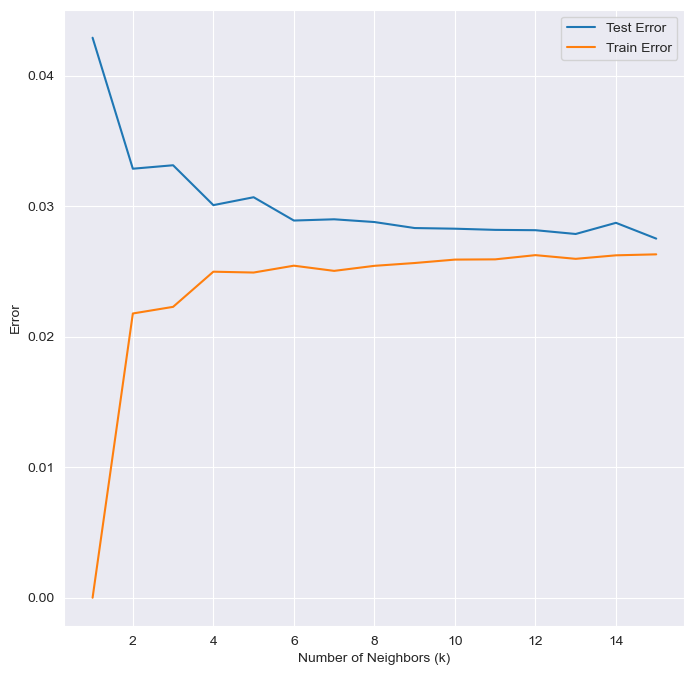

In [25]:
# Plotting k vs train and test error
plt.figure(figsize = (8, 8))

plt.xlabel("Number of Neighbors (k)")

plt.ylabel("Error")

plt.plot(kl, vl, label = 'Test Error')

plt.plot(kl, v2, label = 'Train Error')

plt.legend()

plt.show()

**Observation**: 

- From the above graph, we can say that K=15 gives us the generalized model with very similar train and test errors.